<a href="https://colab.research.google.com/github/Lindelani-3/Python-Notebooks/blob/mainBranch/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Explore Data

### Load Data

In [ ]:
path = "data.csv"
data = pd.read_csv(path)
data.head()

,Credentials,Age,Test Scores,Performance
0,53,30,57,0
1,43,30,68,1
2,57,37,63,1
3,43,29,62,0
4,60,34,60,1


In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']]
y = data['Performance']

### Visualize Data

Pair Plot

The pairplot is used to explore relationships between multiple variables (Age, Test Score, and Credentials) and their interaction with Performance. It shows scatter plots for each pair of variables and incorporates color/hue to represent different levels of Performance.

Pair plots are useful for identifying patterns, trends, and outliers in the data. They help to assess the relationships between variables and determine if there are any linear or non-linear associations. Pair plots can also reveal the presence of clusters or groups within the data by showing distinct patterns in the scatterplots.

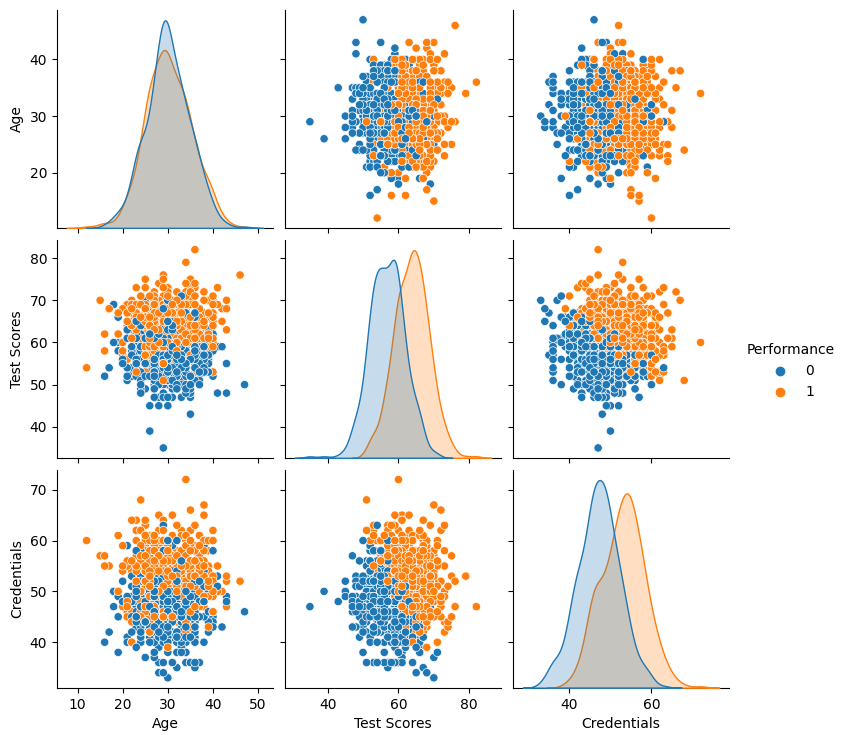

In [ ]:
# Pairplot (for exploring multiple variables)
sns.pairplot(data, vars=['Age', 'Test Scores', 'Credentials'], hue='Performance')
plt.show()

Heat Map

Heatmaps provide a graphical representation of data using colors to depict the values in a matrix-like format, and they are particularly useful for visualizing the correlation matrix between variables in a dataset.

Heatmaps allow for quick identification of clusters or groups of variables that are highly correlated, which can guide feature selection or identify redundant variables. They provide a compact overview of the entire correlation structure, making it easier to spot patterns and make data-driven decisions.

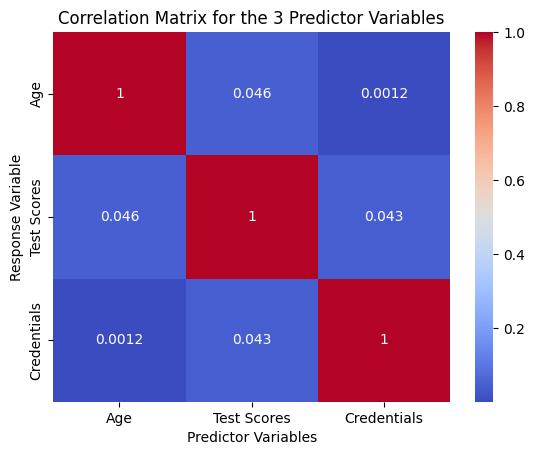

In [ ]:
predictors = ['Age', 'Test Scores', 'Credentials']

# Compute the correlation matrix
corr = data[predictors].corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Add plot title and axis labels
plt.title('Correlation Matrix for the 3 Predictor Variables')
plt.xlabel('Predictor Variables')
plt.ylabel('Response Variable')

# Display the plot
plt.show()

### Data Splitting

In [ ]:
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [ ]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Run Models

In [ ]:
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(3000, 1)
(1000, 1)


### Model 1

todo: feature selection? ({} \ Age?)

In [ ]:
model_1 = LogisticRegression()

In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']].values.reshape(-1, 1)

# Train the model on the training set
model_1.fit(X_train, y_train)


# Evaluate the model on the testing set
test_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Print the performance metrics
print("On Testing Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Evaluate the model on the validation set
val_pred = model_1.predict(X_val)
accuracy = accuracy_score(y_test, val_pred)
precision = precision_score(y_test, val_pred)
recall = recall_score(y_test, val_pred)
f1 = f1_score(y_test, val_pred)

# Print the performance metrics
print("On Validation Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


On Testing Set
Accuracy: 0.88
Precision: 0.8811881188118812
Recall: 0.8811881188118812
F1-score: 0.8811881188118812
On Validation Set
Accuracy: 0.45
Precision: 0.4536082474226804
Recall: 0.43564356435643564
F1-score: 0.4444444444444444


In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']]

coefficients = model_1.coef_[0]
intercept = model_1.intercept_[0]

# Print the coefficients and intercept
print("Intercept:", intercept)
for feature, coefficient in zip(X, coefficients):
    print(f"{feature}: {coefficient}")\

# Sort the coefficients by magnitude (absolute value) in descending order
sorted_coefficients = sorted(zip(X, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
print("\nSorted Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

# Identify the most important features
top_features = [feature for feature, _ in sorted_coefficients[:5]]
print("\nTop Features:")
print(top_features)

Intercept: -54.245961026849606
Age: -0.06361405377166272
Test Scores: 0.5568813108515864
Credentials: 0.450061015178199

Sorted Coefficients:
Test Scores: 0.5568813108515864
Credentials: 0.450061015178199
Age: -0.06361405377166272

Top Features:
['Test Scores', 'Credentials', 'Age']


### Model 2 : L1 Regularization

In [ ]:
# Create a logistic regression model with L1 regularization
model_2 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

In [ ]:
# Train the model on the training set
model_2.fit(X_train, y_train)

# Evaluate the model on the testing set
test_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Print the performance metrics
print("On Testing Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Evaluate the model on the validation set
val_pred = model_2.predict(X_val)
accuracy = accuracy_score(y_test, val_pred)
precision = precision_score(y_test, val_pred)
recall = recall_score(y_test, val_pred)
f1 = f1_score(y_test, val_pred)

# Print the performance metrics
print("On Validation Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

On Testing Set
Accuracy: 0.88
Precision: 0.8811881188118812
Recall: 0.8811881188118812
F1-score: 0.8811881188118812
On Validation Set
Accuracy: 0.445
Precision: 0.4479166666666667
Recall: 0.42574257425742573
F1-score: 0.4365482233502538


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']]

coefficients = model_2.coef_[0]
intercept = model_2.intercept_[0]

# Print the coefficients and intercept
print("Intercept:", intercept)
for feature, coefficient in zip(X, coefficients):
    print(f"{feature}: {coefficient}")\

# Sort the coefficients by magnitude (absolute value) in descending order
sorted_coefficients = sorted(zip(X, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
print("\nSorted Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

# Identify the most important features
top_features = [feature for feature, _ in sorted_coefficients[:5]]
print("\nTop Features:")
print(top_features)

Intercept: -36.36632785682235
Age: -0.06168133187226008
Test Scores: 0.37820258785834365
Credentials: 0.3072516185992281

Sorted Coefficients:
Test Scores: 0.37820258785834365
Credentials: 0.3072516185992281
Age: -0.06168133187226008

Top Features:
['Test Scores', 'Credentials', 'Age']


Probably because L1 Regularization is better for linear models.

### Model 3 : L2 Regularization

In [ ]:
# Create a logistic regression model with L2 regularization (Ridge)
model_3 = LogisticRegression(penalty='l2', C=9.0)

In [ ]:
# Train the model on the training set
model_3.fit(X_train, y_train)

# Evaluate the model on the testing set
test_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Print the performance metrics
print("On Testing Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Evaluate the model on the validation set
val_pred = model_3.predict(X_val)
accuracy = accuracy_score(y_test, val_pred)
precision = precision_score(y_test, val_pred)
recall = recall_score(y_test, val_pred)
f1 = f1_score(y_test, val_pred)

# Print the performance metrics
print("On Validation Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

On Testing Set
Accuracy: 0.88
Precision: 0.8811881188118812
Recall: 0.8811881188118812
F1-score: 0.8811881188118812
On Validation Set
Accuracy: 0.45
Precision: 0.4536082474226804
Recall: 0.43564356435643564
F1-score: 0.4444444444444444


In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']]

coefficients = model_3.coef_[0]
intercept = model_3.intercept_[0]

# Print the coefficients and intercept
print("Intercept:", intercept)
for feature, coefficient in zip(X, coefficients):
    print(f"{feature}: {coefficient}")\

# Sort the coefficients by magnitude (absolute value) in descending order
sorted_coefficients = sorted(zip(X, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
print("\nSorted Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

# Identify the most important features
top_features = [feature for feature, _ in sorted_coefficients[:5]]
print("\nTop Features:")
print(top_features)

Intercept: -54.43649036086011
Age: -0.06392523439471404
Test Scores: 0.5588717493431371
Credentials: 0.4516541085814845

Sorted Coefficients:
Test Scores: 0.5588717493431371
Credentials: 0.4516541085814845
Age: -0.06392523439471404

Top Features:
['Test Scores', 'Credentials', 'Age']


### Model 4: Boosting

In [ ]:
# Create a base logistic regression model
base_model = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_model)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, y_train)

# Evaluate the model on the testing set
test_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Print the performance metrics
print("On Testing Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Evaluate the model on the validation set
val_pred = adaboost.predict(X_val)
accuracy = accuracy_score(y_test, val_pred)
precision = precision_score(y_test, val_pred)
recall = recall_score(y_test, val_pred)
f1 = f1_score(y_test, val_pred)

# Print the performance metrics
print("On Validation Set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
X = data[['Age', 'Test Scores', 'Credentials']]

coefficients = adaboost.coef_[0]
intercept = adaboost.intercept_[0]

# Print the coefficients and intercept
print("Intercept:", intercept)
for feature, coefficient in zip(X, coefficients):
    print(f"{feature}: {coefficient}")\

# Sort the coefficients by magnitude (absolute value) in descending order
sorted_coefficients = sorted(zip(X, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
print("\nSorted Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

# Identify the most important features
top_features = [feature for feature, _ in sorted_coefficients[:5]]
print("\nTop Features:")
print(top_features)